In [ ]:
import n_gram
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def to_byte_pair(context, vocab):
    """
    Tokenize a string into subword units using a simple greedy byte-pair-like algorithm.

    Args:
        context (str): The input string to tokenize.
        vocab (list of str): Known subword tokens, e.g. from a BPE vocabulary.

    Returns:
        list of str: The tokenized input as a list of matched tokens and any leftover characters.
    """
    # Replace spaces with underscores for consistent token matching
    context = context.lower()
    context += "_"
    context = context.replace(' ', '_')
    punctuation = [ '.', '!', '?', ':', ';']
    def remove_punctuation(input_string):
        result = input_string
        for char in punctuation:
            if char != ' ':
                result = result.replace(char, f'_{char}')
        return result

    context = remove_punctuation(context)


    # Sort vocabulary by length (longer matches first)
    vocab.sort(key=lambda x: len(x), reverse=True)

    final_list = []
    mismatch = ""

    while context != "":
        old_context = context
        match = False

        # Try to find the longest matching token at the current position
        for token in vocab:
            if token == context[:len(token)]:
                if mismatch:
                    final_list.append(mismatch)  # Add any mismatched leftover
                final_list.append(token)
                context = context[len(token):]  # Remove matched part
                mismatch = ""
                match = True
                break

        # If no match, accumulate unmatched character(s)
        if not match:
            mismatch += context[0]
            context = context[1:]

        # Safety: break to prevent infinite loop
        if old_context == context:
            break

    # Add any leftover mismatches at the end
    if mismatch:
        final_list.append(mismatch)

    return final_list

Generate perplexities for the different n-grams/datasets

In [ ]:
best = []
with open("../corpora/vocab_best.json", "r", encoding="utf-8") as f:
        best_vocab = json.load(f)

with open("../corpora/Shakespeare_best_merge_train.txt", "r") as f:
    n_gram_corps_train = f.read().split() 

with open("../corpora/Shakespeare_best_merge_test.txt", "r") as f:
    n_gram_corps_test = f.read().split() 

best_fourgram = n_gram.N_gram(n_gram_corps_train, 4, best_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    best.append(best_fourgram.perplexity(n_gram_corps_test, n+1))

N-gram order:  1
Perplexity: 373.93
N-gram order:  2
Perplexity: 113.94
N-gram order:  3
Perplexity: 271.78
N-gram order:  4
Perplexity: 374.79


In [1]:
import json
import n_gram

medium = []
with open("../corpora/vocab_2nd.json", "r", encoding="utf-8") as f:
    medium_vocab = json.load(f)

with open("../corpora/Shakespeare_2nd_best_merge_train.txt", "r") as f:
    medium_corps_train = f.read().split() 

with open("../corpora/Shakespeare_2nd_best_merge_test.txt", "r") as f:
    medium_corps_test = f.read().split() 

medium_fourgram = n_gram.N_gram(medium_corps_train, 4, medium_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    medium.append(medium_fourgram.perplexity(medium_corps_test, n+1))

N-gram order:  1
Perplexity: 394.81
N-gram order:  2
Perplexity: 127.68
N-gram order:  3
Perplexity: 311.53
N-gram order:  4
Perplexity: 425.08


In [3]:

worst = []

with open("../corpora/vocab_3rd.json", "r", encoding="utf-8") as f:
        worst_vocab = json.load(f)

with open("../corpora/Shakespeare_3rd_best_merge_train.txt", "r") as f:
    worst_corps_train = f.read().split() 

with open("../corpora/Shakespeare_3rd_best_merge_test.txt", "r") as f:
    worst_corps_test = f.read().split() 

worst_fourgram = n_gram.N_gram(worst_corps_train, 4, worst_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    worst.append(worst_fourgram.perplexity(worst_corps_test, n+1))

N-gram order:  1
Perplexity: 415.71
N-gram order:  2
Perplexity: 143.20
N-gram order:  3
Perplexity: 354.39
N-gram order:  4
Perplexity: 478.51


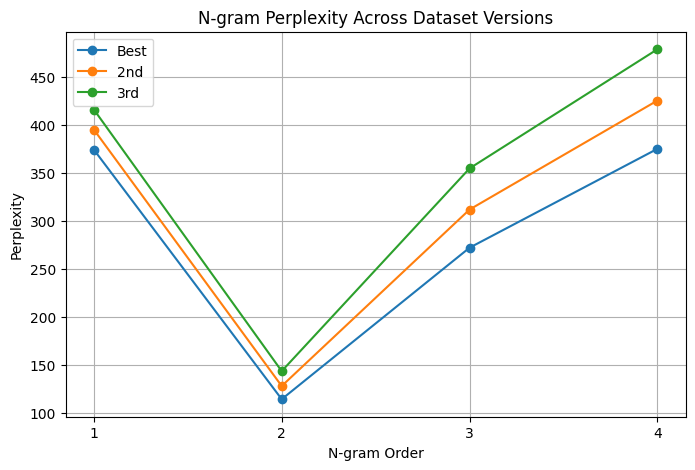

In [ ]:

best = [373.93, 113.94, 271.78, 374.79]
medium = [394.81, 127.68, 311.53, 425.08]
worst = [415.71, 143.20, 354.39, 478.51]
all_perplexities = np.array([best, medium, worst])


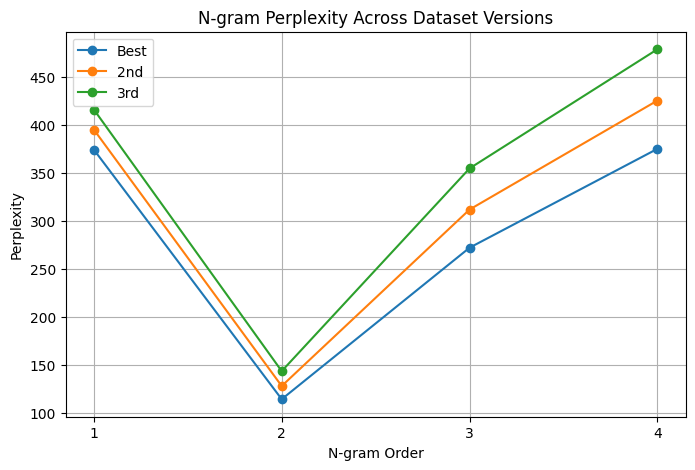

In [ ]:
def plot_perplexities(all_perplexities, fig_path):
    n_grams = [1, 2, 3, 4]
    versions = ["Best", "2nd", "3rd"]
    plt.figure(figsize=(8,5))
    for i in range(all_perplexities.shape[0]):
        plt.plot(n_grams, all_perplexities[i], marker='o', label=versions[i])
        plt.xticks(n_grams)
        plt.xlabel("N-gram Order")
        plt.ylabel("Perplexity")
        plt.title("N-gram Perplexity Across Dataset Versions")
        plt.legend()
        plt.grid(True)
        plt.savefig(fig_path)
        
plot_perplexities(all_perplexities, "../img/ngram_perplexities.png")

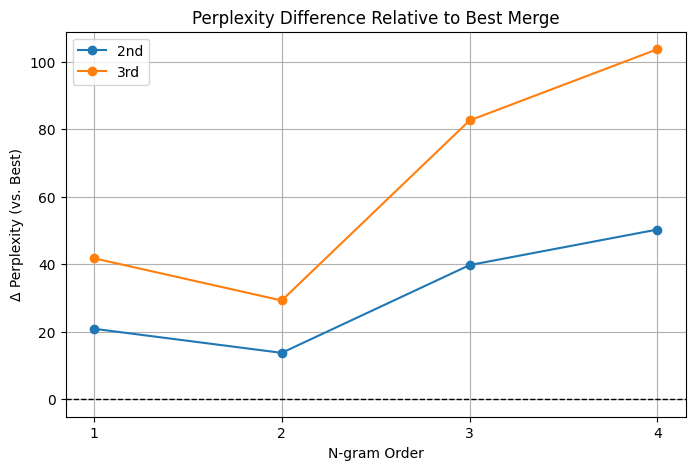

In [ ]:

def plot_prplx_diff(all_perplexities, fig_path):
    n_grams = [1, 2, 3, 4]
    versions = ["2nd", "3rd"]

    # compute differences relative to "Best"
    diffs = all_perplexities[1:] - all_perplexities[0]

    plt.figure(figsize=(8,5))
    for i in range(diffs.shape[0]):
        plt.plot(n_grams, diffs[i], marker='o', label=versions[i])

    plt.xticks(n_grams)
    plt.xlabel("N-gram Order")
    plt.ylabel("Δ Perplexity (vs. Best)")
    plt.title("Perplexity Difference Relative to Best Merge")
    plt.axhline(0, color="black", linewidth=1, linestyle="--")
    plt.legend()
    plt.grid(True)
    plt.savefig(fig_path)
    
plot_prplx_diff(all_perplexities, "../img/ngram_perplexities2.png")

Generate examples for the different n-grams/datasets

In [42]:
context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, best_vocab)
    text = best_fourgram.generate(i+1,100, byte, 4)
    print(f"best, n = {i+1}: {text}")

best, n = 1: cleopatra is my , , and the , , , the , , and , , and and , and . 
best, n = 2: cleopatra is my lord polonius i do not . 
best, n = 3: cleopatra is my daggers, and all things shall be . 
best, n = 4: cleopatra is my dagvalour of my evance validityvalued to vy and provoking tere's the sky and vanishes whvaliant is vanik, where savvy to thy knieces vain, the train, with purpose . 


In [7]:
context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, medium_vocab)
    text = medium_fourgram.generate(i+1,100, byte, 4)
    print(f"medium, n = {i+1}: {text}")

medium, n = 1: cleopatra is my , . 
medium, n = 2: cleopatra is my lord ; 
medium, n = 3: cleopatra is my buvalour, and i will not be aways, and that is not so . 
medium, n = 4: cleopatra is my butt, and knaviv . 


In [4]:
context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, worst_vocab)
    text = worst_fourgram.generate(i+1,100, byte, 4)
    print(f"worst, n = {i+1}: {text}")

worst, n = 1: cleopatra is my , and , . 
worst, n = 2: cleopatra is my lord polonius 'er, i will i am not a man : 
worst, n = 3: cleopatra is my lord . 
worst, n = 4: cleopatra is my name ; 
